In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("Mall_Customers.csv")

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

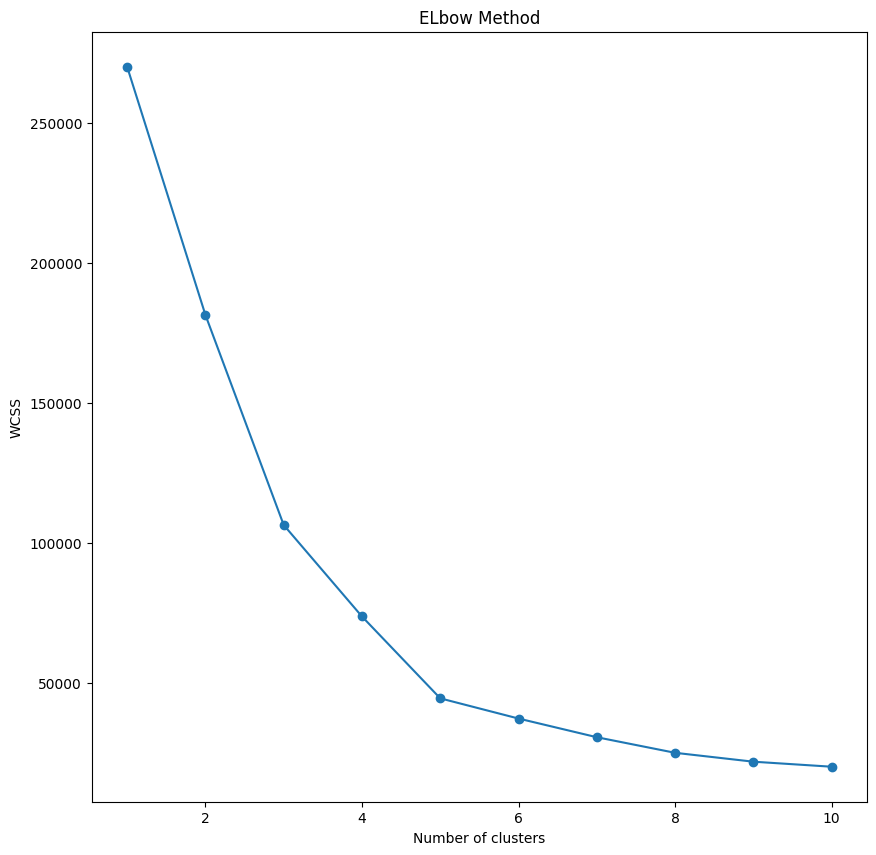

In [23]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss,marker='o')
plt.title("ELbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [25]:
from sklearn.metrics import davies_bouldin_score
dbi=davies_bouldin_score(X,y_kmeans)
print(f"Davies Bouldin Score:{dbi}")

Davies Bouldin Score:0.5725628995597082


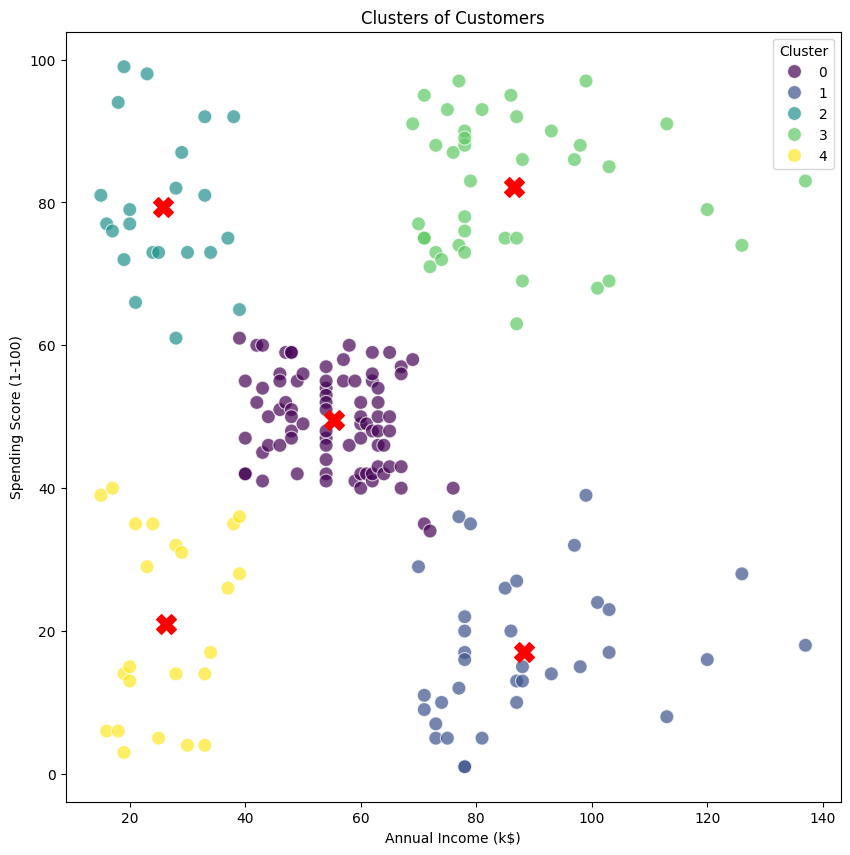

In [26]:
data['Cluster']=y_kmeans
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='viridis',s=100,alpha=0.7)

center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='red',s=200,marker='X',label='Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()